#  Project 2 - Use your python to create an account on website and login!

**In this project, I will try to use python to login in a recipe website.**
- Use browser to create an account on https://www.allrecipes.com
- Write a program that logs into your account
- Verify that you are logged in by "looking for your username" in the HTML response

**Several takeaways here**
1. When you try opening a website through its link, you are making a request to the server-side to fetch you the HTML files and other static files such as CSS and JavaScript. This request is known as the **GET request**. However when you are filling a form, uploading a media file or a document, creating a post and clicking let’s say a submit button, you are sending information to the server side. This request is known as the **POST request**.

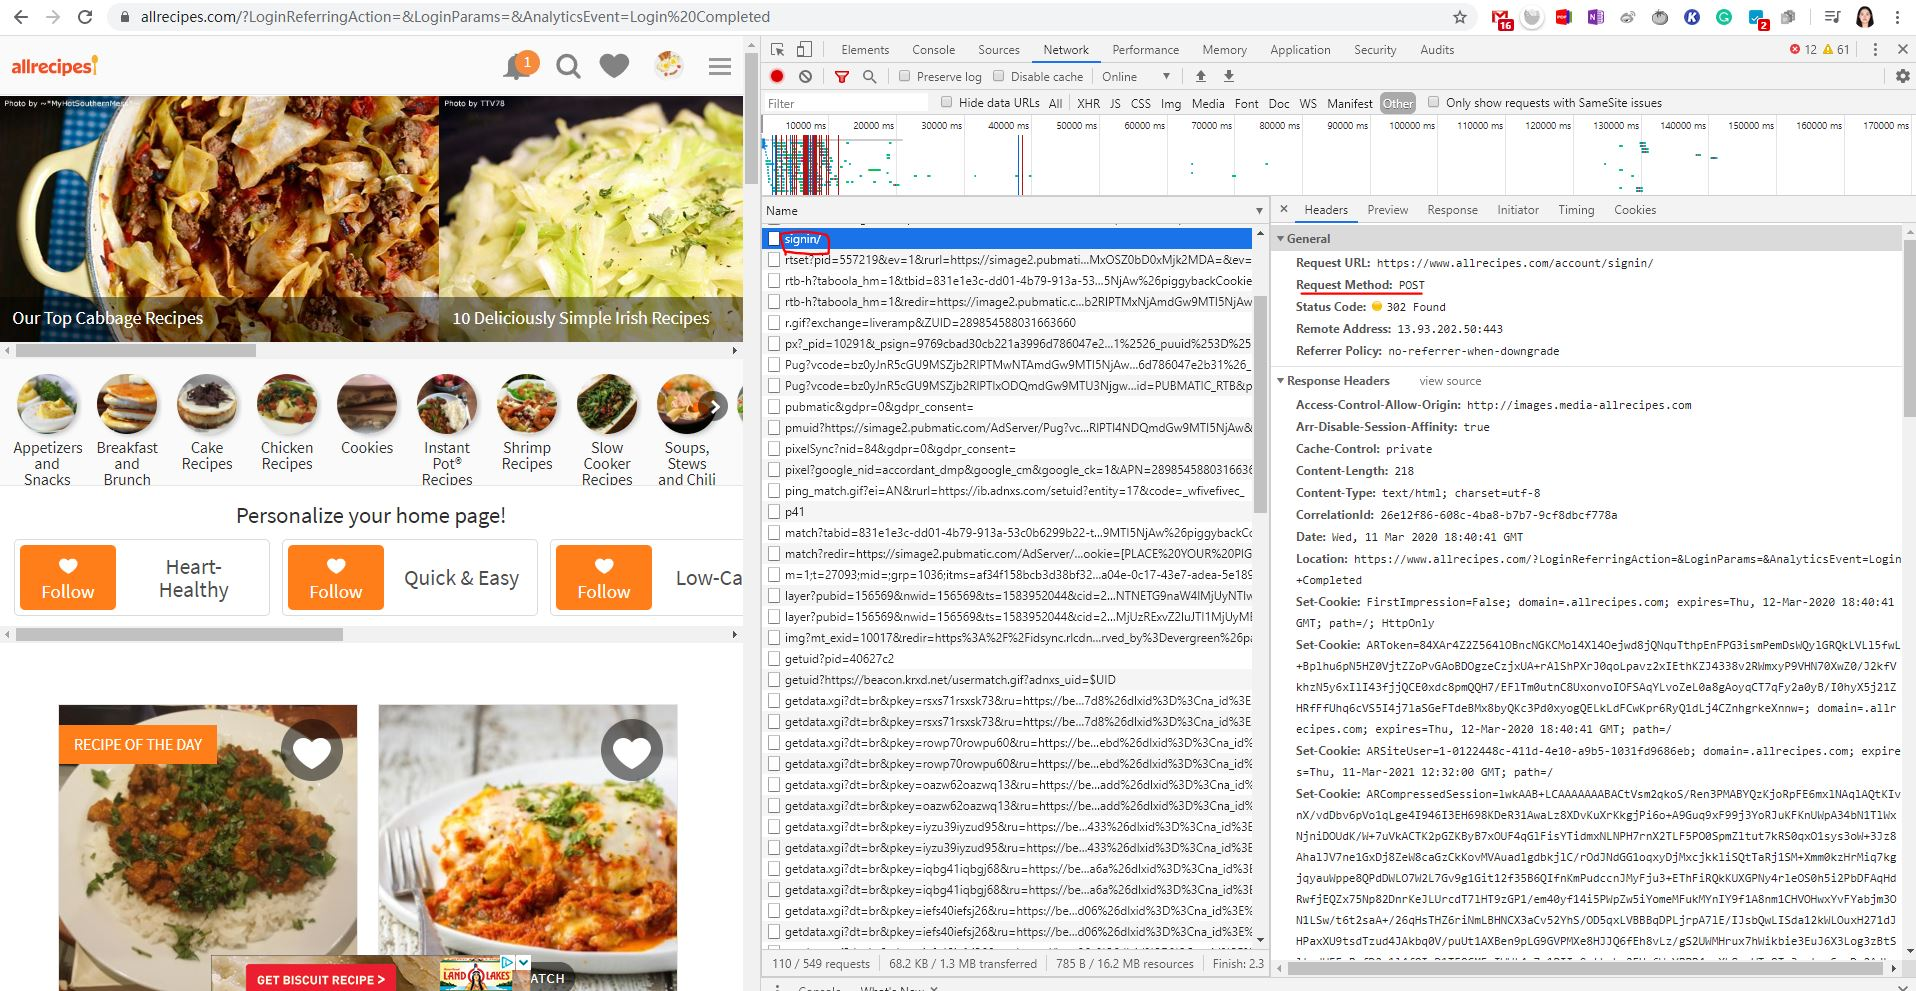

2.  You could find information you need to submit by looking for "$<form$>...$</form$>" section in source code,then looking for   
"$<input$>"elements

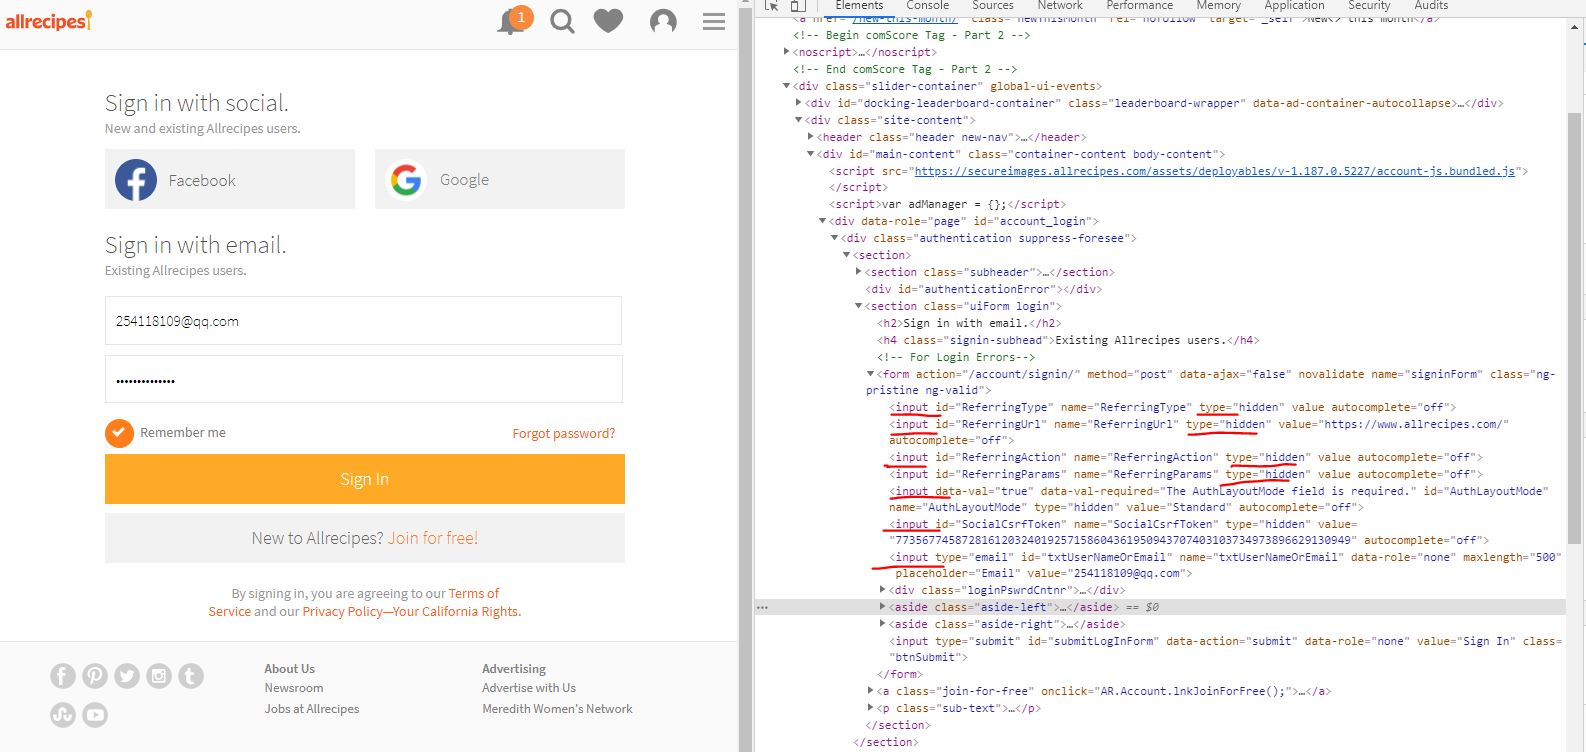

3. Cookie is another important element,sometimes the website keep changing your cookie, which will increase the difficulty of scrapping!

**Done with the talking! Let's get the hand dirty!**

In [1]:
# import the package
from requests import Session
from bs4 import BeautifulSoup as bs

In [2]:
# simulate the login 
# get access to the page content of the login page
with Session() as s: # Sesssion() carries the cookies for you
    site = s.get("https://www.allrecipes.com/account/signin/")# this is the login url
    bs_content = bs(site.content, "html.parser")
    #provide the login parameter that appear in "Form Data" in the first POST request after login
    login_data = {"txtUserNameOrEmail": "254118109@qq.com"
                  ,"password":"Webscrap123456", \
                  "SocialCsrfToken":"773567745872816120324019257158604361950943707403103734973896629130949"}
    # POST your login information to the webserver, this is simulating the login step
    response=s.post("https://www.allrecipes.com/account/signin/",login_data)
    #print the website after login
    home_page = s.get("https://www.allrecipes.com/account/signin/")
    login_content = bs(home_page.content, "html.parser")
    print(login_content)


<!DOCTYPE html>

<html lang="en-us">
<head>
<title>Allrecipes | Food, friends, and recipe inspiration</title>
<script async="true" src="https://secureimages.allrecipes.com/assets/deployables/v-1.187.0.5227/karma.bundled.js"></script>
<!--Make our website baseUrl available to the client-side code-->
<script type="text/javascript">
        var AR = AR || {};

        AR.segmentWriteKey = "RnmsxUrjIjM7W62olfjKgJrcsVlxe68V";
        AR.baseWebsiteUrl = 'https://www.allrecipes.com';
window.dataLayer={"version":"1.0","pageInstanceId":"www.allrecipes.com/","externalLinkId":"","page":{"pageInfo":{"pageId":"","pageName":"/","destinationUrl":"https://www.allrecipes.com/","sysEnv":"RD0003FFB37A5A","variant":"Control","version":"","issueDate":"03/11/2020 20:27:36","effectiveDate":"03/11/2020 20:27:36","domain":"www.allrecipes.com","parameters":{}},"category":{"primaryCategory":"home page","contentType":"home page","subContentType":"","adZone":"","adKeys":"status=freeloggedin;oid=;fit=0;id=1","con

Succeed!

In [3]:
# verify whether the username appears in current loaded page
login_content.find('span','username').get_text()

'vincyhu'

Succeed!